In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
data = {
    'age': [25, 30, np.nan, 35, 40],
    'gender': ['male', 'female', 'female', np.nan, 'male'],
    'salary': [50000, 60000, 55000, 65000, np.nan],
    'purchased': ['no', 'yes', 'no', 'yes', 'no']
}
df = pd.DataFrame(data)

In [16]:
X = df.drop('purchased', axis=1)
y = df['purchased']

In [17]:
num_features = ['age', 'salary']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
cat_features = ['gender']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])


In [20]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=3))  # Changed k to match the number of features
])

In [21]:
X_preprocessed = pipeline.fit_transform(X, y)
cat_onehot_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)
all_features = num_features + cat_onehot_features.tolist()


In [22]:
selected_features = np.array(all_features)[pipeline.named_steps['feature_selection'].get_support()]

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=selected_features)

print(X_preprocessed_df)

   salary  gender_female  gender_male
0    -1.5            0.0          1.0
1     0.5            1.0          0.0
2    -0.5            1.0          0.0
3     1.5            1.0          0.0
4     0.0            0.0          1.0


Text(0.5, 1.0, 'Box Plot of Preprocessed Features')

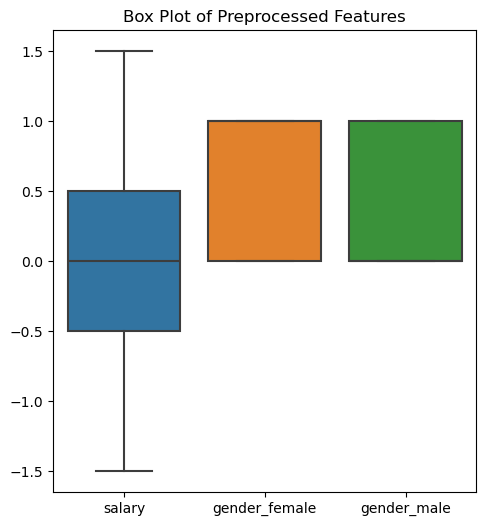

In [23]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=X_preprocessed_df)
plt.title('Box Plot of Preprocessed Features')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


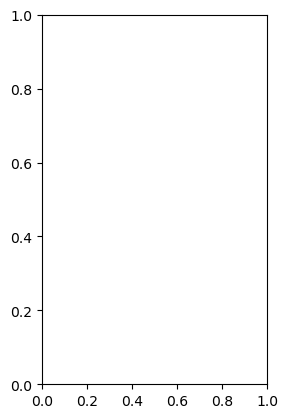

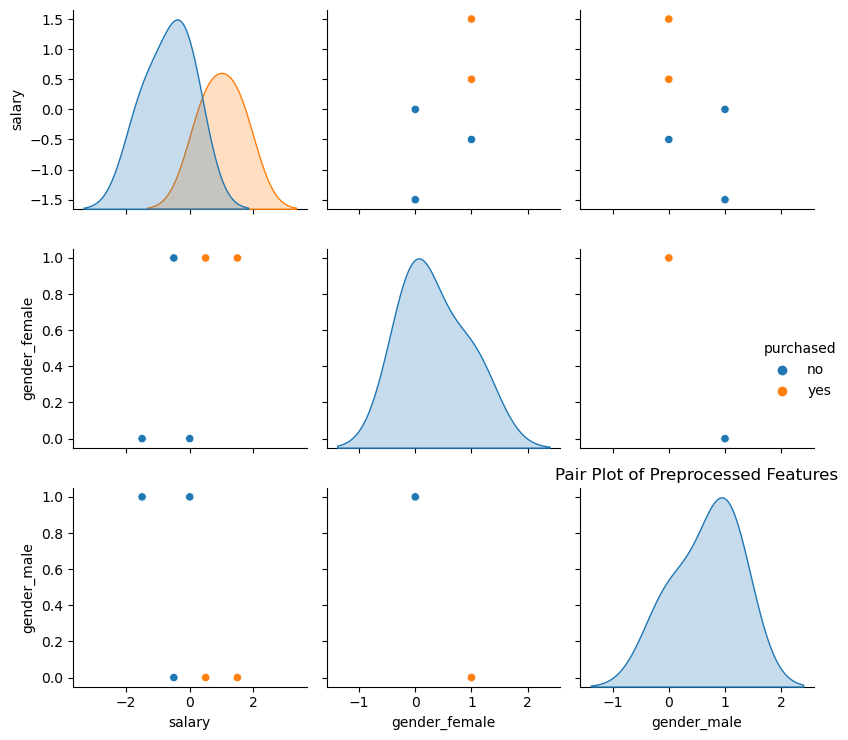

In [25]:
plt.subplot(1, 2, 2)
sns.pairplot(pd.concat([X_preprocessed_df, y.reset_index(drop=True)], axis=1), hue='purchased')
plt.title('Pair Plot of Preprocessed Features')

plt.tight_layout()
plt.show()